# Projeto de Técnicas de Programação I

Você trabalha em uma consultoria de dados que foi contratada para realizar a distribuição de materiais didáticos nas escolas da cidade do Rio de Janeiro. Sua missão é realizar tratamentos nos dados de acordo com as normas de padrão definidas pelo cliente e encontrar qual a melhor rota que um caminhão deve realizar para entregar os materiais didáticos de forma a otimizar o seu percurso. 

Para esse projeto você recebeu três arquivos:
- escolas.csv: contém os dados das escolas
- subprefeituras.csv: contém dados de quais bairros pertem a cada subprefeitura
- material_didatico.csv: contém a quantidade de material didático que cada escola deve receber

Como produto final, você deve entregar:
- um arquivo csv no as linhas já estarão ordenas de acordo com a rota a ser seguida. Além disso, os dados devem estar no padrão especificado abaixo e contendo as seguintes colunas: id da escola, nome da escola, tipo da escola (EM, CIEP ou colégio), logradouro da entrega, número, bairro, subprefeitura, latitude, longitude e quantidade de material didático que deve ser entregue. O logradouro da escola deve estar em uma coluna diferente do número;
- um arquivo csv com a quantidade total de material escolar por subprefeitura para que sejam contabilizados os custos por subprefeitura

Como padrão dos dados, considere:
- nome das colunas em snake_case
- strings não devem conter acentos
- todas as strings devem estar em maiúsculo
- padronização do nome dos logradouros sem abreviação (Ex: R. deve estar como Rua)
- latitude e longitude devem conter apenas 5 casas decimais
- os ids da escola devem todos ser strings com 3 caracteres (Ex: '024')

Desafio:

Entregar um plot com a representação da melhor rota que você encontrou, por exemplo:
<img src="rota.png"  width="70%" height="40%">

Obs: O otimizador não é a parte mais importante do projeto. Foque no tratamento dos dados e se preciso, pode reduzir a quantidade de escolas para rodar o otimizador.


In [188]:
import pandas as pd
import numpy as np
from unidecode import unidecode
import math
import matplotlib.pyplot as plt

In [189]:
escolas = pd.read_csv('escolas.csv', encoding='utf-8')
mt_dida = pd.read_csv('material_didatico.csv')
sub_pref = pd.read_csv('subprefeituras.csv', encoding='utf-8')

### Visualizando os dataframes

In [190]:
escolas.head(3)

,id,Escolas_Postos,BAIRRO,ENDEREÇO,lat,lon
0,178,CENTRO INTEGRADO DE EDUCAÇÃO PÚBLICA HENFIL,CAJU,Rua Carlos Seidl S/Nº,"-22,880888","-43,225326"
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,Rua Ébano 187,"-22,889574","-43,236202"
2,483,EM CELESTINO SILVA,CENTRO,"R. do Lavradio, 56","-22,909293","-43,183579"


In [191]:
mt_dida.head(3)

,id,Quantidade
0,178,20
1,634,121
2,483,220


In [192]:
sub_pref.head(3)

,nome,subprefeitura
0,Santo Cristo,Centro
1,Gamboa,Centro
2,Saúde,Centro


### Realizando transformações e preparando os dados

Como padrão dos dados, considere:
- nome das colunas em snake_case
- strings não devem conter acentos
- todas as strings devem estar em maiúsculo
- padronização do nome dos logradouros sem abreviação (Ex: R. deve estar como Rua)
- latitude e longitude devem conter apenas 5 casas decimais
- os ids da escola devem todos ser strings com 3 caracteres (Ex: '024')

Os acentos foram removidos apenas de dois dataframes devido aos dados do material didático conterem apenas números.

In [193]:
# Removendo acentos no df escolas
escolas["Escolas_Postos"] = escolas["Escolas_Postos"].apply(lambda x: unidecode(x))
escolas["BAIRRO"] = escolas["BAIRRO"].apply(lambda x: unidecode(x))
escolas['ENDEREÇO '] = escolas['ENDEREÇO '].apply(lambda x: unidecode(x))
# Removendo acentos no df sub_prefeituras
sub_pref["subprefeitura"] = sub_pref["subprefeitura"].apply(lambda x: unidecode(x))
sub_pref["nome"] = sub_pref["nome"].apply(lambda x: unidecode(x))

In [194]:
escolas.head(3)

,id,Escolas_Postos,BAIRRO,ENDEREÇO,lat,lon
0,178,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL,CAJU,Rua Carlos Seidl S/No,"-22,880888","-43,225326"
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,Rua Ebano 187,"-22,889574","-43,236202"
2,483,EM CELESTINO SILVA,CENTRO,"R. do Lavradio, 56","-22,909293","-43,183579"


In [195]:
sub_pref.head(3)

,nome,subprefeitura
0,Santo Cristo,Centro
1,Gamboa,Centro
2,Saude,Centro


Transformando os nomes das colunas em snake_case.

In [196]:
# Renomeando a coluna ENDEREÇO e transformando o conteúdo em maiúsculo
escolas = escolas.rename(columns={'ENDEREÇO ': 'endereço'})
escolas = escolas.rename(columns={'BAIRRO': 'bairro'})
escolas = escolas.rename(columns={'Escolas_Postos': 'escolas_postos'})
escolas['endereço'] = escolas['endereço'].str.upper()
escolas.head(3)

,id,escolas_postos,bairro,endereço,lat,lon
0,178,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL,CAJU,RUA CARLOS SEIDL S/NO,"-22,880888","-43,225326"
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,RUA EBANO 187,"-22,889574","-43,236202"
2,483,EM CELESTINO SILVA,CENTRO,"R. DO LAVRADIO, 56","-22,909293","-43,183579"


In [197]:
# Renomeando a coluna de nome para BAIRRO e transformando as str em maiúsculas
sub_pref = sub_pref.rename(columns={'nome': 'bairro'})
sub_pref['bairro'] = sub_pref['bairro'].str.upper()
sub_pref['subprefeitura'] = sub_pref['subprefeitura'].str.upper()
sub_pref.head(3)

,bairro,subprefeitura
0,SANTO CRISTO,CENTRO
1,GAMBOA,CENTRO
2,SAUDE,CENTRO


In [198]:
# Renomeando a coluna de Quantidade para QUANTIDADE
mt_dida = mt_dida.rename(columns={'Quantidade': 'quantidade'})

Unindo os 3 dataframes pelo 'id' e pelo 'bairro'.

In [199]:
table = pd.merge(pd.merge(escolas, mt_dida),sub_pref)

Para que as colunas 'lat' e 'lon' possuam apenas 5 casas decimais, é importante que os dados seja do tipo float. Por isso, estamos verificando o tipo de dados de cada coluna e alterando os dados citados para o formato necessário.

In [200]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              143 non-null    int64 
 1   escolas_postos  143 non-null    object
 2   bairro          143 non-null    object
 3   endereço        143 non-null    object
 4   lat             143 non-null    object
 5   lon             143 non-null    object
 6   quantidade      140 non-null    object
 7   subprefeitura   143 non-null    object
dtypes: int64(1), object(7)
memory usage: 9.1+ KB


In [201]:
# Padronizando o logradouro
table['endereço'] = table['endereço'].str.replace(',',' ')
table['endereço'] = table['endereço'].str.replace('R.','RUA ')

In [202]:
table['escolas_postos'] = table['escolas_postos'].str.replace('.','')

In [203]:
# Tabela final pré-pronta
table.head(3)

,id,escolas_postos,bairro,endereço,lat,lon,quantidade,subprefeitura
0,178,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL,CAJU,RUA CARLOS SEIDL S/NO,"-22,880888","-43,225326",20,CENTRO
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,RUA EBANO 187,"-22,889574","-43,236202",121,CENTRO
2,600,EM URUGUAI,BENFICA,RUA ANA NERI 192,"-22,898488","-43,237756",591,CENTRO


In [204]:
table

,id,escolas_postos,bairro,endereço,lat,lon,quantidade,subprefeitura
0,178,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL,CAJU,RUA CARLOS SEIDL S/NO,"-22,880888","-43,225326",20,CENTRO
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,RUA EBANO 187,"-22,889574","-43,236202",121,CENTRO
2,600,EM URUGUAI,BENFICA,RUA ANA NERI 192,"-22,898488","-43,237756",591,CENTRO
3,483,EM CELESTINO SILVA,CENTRO,RUA DO LAVRADIO 56,"-22,909293","-43,183579",220,CENTRO
4,490,EM TIA CIATA,CENTRO,AVENIDA PRESIDENTE VARGAS S/NO,"-22,907123","-43,195068",578,CENTRO
...,...,...,...,...,...,...,...,...
138,289,EM BERTHA LUTZ,GUARATIBA,ESTRADA DO PIAI 2075,"-22,979064","-43,67058",329,ZONA OESTE
139,474,EM ENGENHEIRO GASTAO RANGEL,GUARATIBA,ESTRADA DO MAGARCA 9.183,"-22,98046","-43,643545",320,ZONA OESTE
140,301,EM JONATAS SERRANO,GUARATIBA,ESTRADA DO MATO ALTO S/NO,"-22,953163","-43,577409",335,ZONA OESTE
141,215,EM NARCISA AMALIA,ILHA DE GUARATIBA,ESTRADA TEODORETO DE CAMARGO S/N.O,"-23,009084","-43,537582",NaN,ZONA OESTE


### Criando colunas

In [205]:
log_num = table['endereço'].str.split(' ')
tipo_escola = table['escolas_postos'].str.split(' ')

In [206]:
len(table)

143

In [ ]:
# Endereço é separado por logradouro e número
table['número'] = ''
table['logradouro'] = ''
table['tipo_escola'] = ''
for i in range(len(table)):
    table['número'][i] = log_num[i][-1]
    table['logradouro'][i] = log_num[i][0]
    table['tipo_escola'][i] = tipo_escola[i][0]

In [208]:
# Verificando se os dados estão dentro do padrão solicitado
table['tipo_escola'].unique()

array(['CENTRO', 'EM', 'ESCOLA', 'CIEP', 'COLEGIO'], dtype=object)

In [209]:
lat = table['lat'].str.replace(',','.')
lat = lat.astype(float)

In [210]:
lon = table['lon'].str.replace(',','.')
lon = lon.astype(float)

In [211]:
table['lat'] = lat.round(5)
table['lon'] = lon.round(5)

In [212]:
# Dados ausentes?
table.isnull().sum()

id                0
escolas_postos    0
bairro            0
endereço          0
lat               0
lon               0
quantidade        3
subprefeitura     0
número            0
logradouro        0
tipo_escola       0
dtype: int64

In [213]:
# Tamanho da base
table.shape

(143, 11)

In [214]:
# Removendo 3 linhas de dados ausentes
table = table.dropna(axis=0)

In [ ]:
# Visualizando os ids e verificando se existem ids com menos de 3 caracteres
table['id'].unique()

In [215]:
# Convertendo os IDs em strings e preenchendo com zeros à esquerda
table['id'] = [str(id_).zfill(3) for id_ in table['id']]


/tmp/ipykernel_10652/3986737917.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['id'] = [str(id_).zfill(3) for id_ in table['id']]


In [216]:
table['id'].unique()

array(['178', '634', '600', '483', '490', '476', '132', '089', '017',
       '540', '055', '387', '331', '450', '558', '413', '309', '523',
       '268', '035', '011', '163', '361', '226', '638', '126', '180',
       '587', '653', '660', '382', '217', '378', '020', '025', '373',
       '624', '157', '117', '351', '502', '135', '440', '388', '259',
       '422', '041', '537', '566', '161', '230', '498', '379', '399',
       '616', '144', '534', '342', '139', '146', '663', '121', '263',
       '118', '140', '260', '069', '090', '274', '676', '390', '608',
       '589', '256', '091', '248', '623', '603', '673', '520', '308',
       '576', '171', '477', '031', '514', '023', '415', '016', '570',
       '690', '202', '211', '466', '636', '206', '527', '586', '080',
       '398', '175', '495', '641', '689', '568', '255', '320', '052',
       '323', '560', '246', '311', '297', '573', '319', '316', '497',
       '584', '515', '210', '289', '474', '301', '606'], dtype=object)

In [217]:
len(table['escolas_postos'].unique())

124

Para verificar se há duplicatas, foram selecionadas as colunas 'id', 'escolas_postos', 'lat' e 'lon'. Isso porque pode haver duas escolas com o mesmo nome no mesmo bairro, porém, é impossível que exista duas escolas com o mesmo nome e id ocupando a mesma coordenada.

In [229]:
# Verificando se há duplicatas com base nas colunas 'id', 'escolas_postos', 'lat' e 'lon'
duplicatas = table.duplicated(subset=['id', 'escolas_postos', 'lat', 'lon'])
for i in duplicatas:
    if i == True:
        print(i)

True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [233]:
# Quantidade de dados duplicados
print(sum(duplicatas))

14


In [234]:
# Removendo duplicatas
table = table.drop_duplicates()

In [235]:
table

,id,escolas_postos,bairro,endereço,lat,lon,quantidade,subprefeitura,número,logradouro,tipo_escola
0,178,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL,CAJU,RUA CARLOS SEIDL S/NO,-22.88089,-43.22533,20,CENTRO,S/NO,RUA,CENTRO
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,RUA EBANO 187,-22.88957,-43.23620,121,CENTRO,187,RUA,EM
2,600,EM URUGUAI,BENFICA,RUA ANA NERI 192,-22.89849,-43.23776,591,CENTRO,192,RUA,EM
3,483,EM CELESTINO SILVA,CENTRO,RUA DO LAVRADIO 56,-22.90929,-43.18358,220,CENTRO,56,RUA,EM
4,490,EM TIA CIATA,CENTRO,AVENIDA PRESIDENTE VARGAS S/NO,-22.90712,-43.19507,578,CENTRO,S/NO,AVENIDA,EM
...,...,...,...,...,...,...,...,...,...,...,...
137,210,EM DEBORA MENDES DE MORAES,PEDRA DE GUARATIBA,RUA BELCHIOR DA FONSECA 643,-23.00142,-43.63876,570,ZONA OESTE,643,RUA,EM
138,289,EM BERTHA LUTZ,GUARATIBA,ESTRADA DO PIAI 2075,-22.97906,-43.67058,329,ZONA OESTE,2075,ESTRADA,EM
139,474,EM ENGENHEIRO GASTAO RANGEL,GUARATIBA,ESTRADA DO MAGARCA 9.183,-22.98046,-43.64354,320,ZONA OESTE,9.183,ESTRADA,EM
140,301,EM JONATAS SERRANO,GUARATIBA,ESTRADA DO MATO ALTO S/NO,-22.95316,-43.57741,335,ZONA OESTE,S/NO,ESTRADA,EM


### Otimizador



In [236]:
def distance(point1, point2):
    """
    Calcula a distância entre dois pontos geográficos, usando a fórmula de Haversine.
    """
    lat1, lon1 = point1
    lat2, lon2 = point2
    R = 6371  # raio da Terra em quilômetros
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = (
        math.sin(delta_phi / 2) ** 2
        + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda / 2) ** 2
    )
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    d = R * c
    return d

In [237]:
def nearest_neighbor(points):
    unvisited = set(range(1, len(points)))  # índices que representam os pontos não visitados
    current_point = 0
    route = [current_point]

    while unvisited:
        nearest = min(
            unvisited, key=lambda x: distance(points[current_point], points[x])
        )
        route.append(nearest)
        unvisited.remove(nearest)
        current_point = nearest

    #route.append(0)  # Volta ao ponto inicial para fechar o ciclo
    return route

In [238]:
# Definindo pontos_entrega
pontos_entrega = list(zip(table['lat'], table['lon']))

In [239]:
# Visualizando o formato dos dados
pontos_entrega[:3]

[(-22.88089, -43.22533), (-22.88957, -43.2362), (-22.89849, -43.23776)]

In [240]:
# Calculando a melhor rota
best_route = nearest_neighbor(pontos_entrega)
print("Melhor rota:", best_route)

Melhor rota: [0, 1, 2, 5, 25, 7, 6, 10, 4, 3, 12, 20, 13, 18, 17, 11, 15, 14, 19, 8, 9, 31, 28, 29, 24, 26, 38, 39, 45, 40, 46, 67, 65, 63, 66, 64, 52, 51, 62, 61, 49, 50, 48, 78, 80, 44, 47, 69, 72, 89, 86, 77, 68, 87, 97, 88, 104, 76, 74, 75, 73, 82, 81, 84, 85, 105, 106, 83, 101, 100, 103, 102, 57, 60, 55, 108, 110, 53, 54, 56, 59, 109, 117, 115, 111, 112, 114, 113, 118, 116, 119, 58, 125, 126, 122, 124, 121, 123, 120, 93, 92, 96, 95, 90, 91, 99, 33, 37, 34, 32, 43, 42, 41, 30, 36, 35, 27, 22, 23, 21, 79, 107, 94, 71, 70, 16, 98]


In [241]:
len(best_route)

127

### Arquivo CSV

Como produto final, você deve entregar:
- um arquivo csv no as linhas já estarão ordenas de acordo com a rota a ser seguida. Além disso, os dados devem estar no padrão especificado abaixo e contendo as seguintes colunas: id da escola, nome da escola, tipo da escola (EM, CIEP ou colégio), logradouro da entrega, número, bairro, subprefeitura, latitude, longitude e quantidade de material didático que deve ser entregue. O logradouro da escola deve estar em uma coluna diferente do número;
- um arquivo csv com a quantidade total de material escolar por subprefeitura para que sejam contabilizados os custos por subprefeitura

In [242]:
table['rota'] = best_route

/tmp/ipykernel_10652/1126297090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['rota'] = best_route


In [243]:
table.head(4)

,id,escolas_postos,bairro,endereço,lat,lon,quantidade,subprefeitura,número,logradouro,tipo_escola,rota
0,178,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL,CAJU,RUA CARLOS SEIDL S/NO,-22.88089,-43.22533,20,CENTRO,S/NO,RUA,CENTRO,0
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,RUA EBANO 187,-22.88957,-43.23620,121,CENTRO,187,RUA,EM,1
2,600,EM URUGUAI,BENFICA,RUA ANA NERI 192,-22.89849,-43.23776,591,CENTRO,192,RUA,EM,2
3,483,EM CELESTINO SILVA,CENTRO,RUA DO LAVRADIO 56,-22.90929,-43.18358,220,CENTRO,56,RUA,EM,5


In [277]:
# Ordenando as escolas de acordo com a rota
rota = table.sort_values(by='rota').copy()

O CSV final não deve conter a coluna endereço, como definido pelo exercício. Por isso, estamos removendo.

In [278]:
# Remover a coluna 'endereço'
rota = rota.drop(columns=['endereço'])

In [279]:
rota.head()

,id,escolas_postos,bairro,lat,lon,quantidade,subprefeitura,número,logradouro,tipo_escola,rota
0,178,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL,CAJU,-22.88089,-43.22533,20,CENTRO,S/NO,RUA,CENTRO,0
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,-22.88957,-43.23620,121,CENTRO,187,RUA,EM,1
2,600,EM URUGUAI,BENFICA,-22.89849,-43.23776,591,CENTRO,192,RUA,EM,2
13,540,EM HENRIQUE DODSWORTH,IPANEMA,-22.98196,-43.21358,516,ZONA SUL,474,AVENIDA,EM,3
11,017,EM PRESIDENTE JOSE LINHARES,IPANEMA,-22.98333,-43.19904,48,ZONA SUL,90,RUA,EM,4


In [249]:
# Salvar a rota em um arquivo CSV
rota.to_csv('rota.csv', index=False)

# DESAFIO ACEITO!

In [ ]:
print(rota)

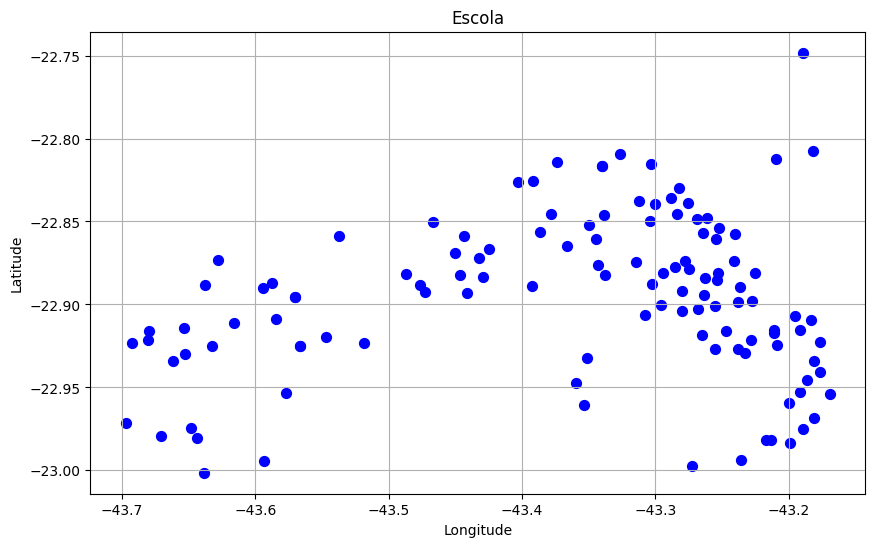

In [294]:
# Selecionar apenas a primeira escola
escola = rota.iloc[0:120]

# Extrair coordenadas da primeira escola
lat = escola['lat']
lon = escola['lon']

# Plotar a primeira escola
plt.figure(figsize=(10, 6))
plt.scatter(lon, lat, color='blue', marker='o', s=50)

# Adicionar título e rótulos dos eixos
plt.title('Escola')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#plt.xlim(-43.36, -43.34)  # Ajuste os limites do eixo x conforme necessário
#plt.ylim(-22.90, -22.88)  # Ajuste os limites do eixo y conforme necessário

# Exibir o gráfico
plt.grid(True)
plt.show()

In [282]:
print(min(lat), max(lat))
print(min(lon), max(lon))

-22896931.0 -22.74828
-43352667.0 -43.16888
